# Cutout generation

Experiment with a couple of different methods for downloading cutout images from the HSC survey.

In [2]:
from unagi import hsc
from unagi.task import hsc_cutout, hsc_tricolor
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy import wcs
from unagi import plotting
import matplotlib.pyplot as plt

In [3]:
# Following the tutorial at https://github.com/dr-guangtou/unagi/blob/master/demo/demo_hsc_cutout.ipynb
# User: locan@local, Pass: zyNtk1So2TUMMbDqInxXnRM3a759GyqChhGm6xmD
pdr2 = hsc.Hsc(dr='pdr2', rerun='pdr2_dud') # How to access pdr3?

# Get table list from /Library/Python/3.9/site-packages/unagi-0.1.3.dev19-py3.9.egg/unagi/data/pdr2_dud/pdr2_dud_tables.fits


In [4]:
# Design the cutout region
coord = SkyCoord("2:23:03 -4:36:22", unit=(u.hour, u.deg))
size = 60 * u.arcsec

filters = 'gri' 
output_dir = './'

# Retrieving cutout image in filter: i


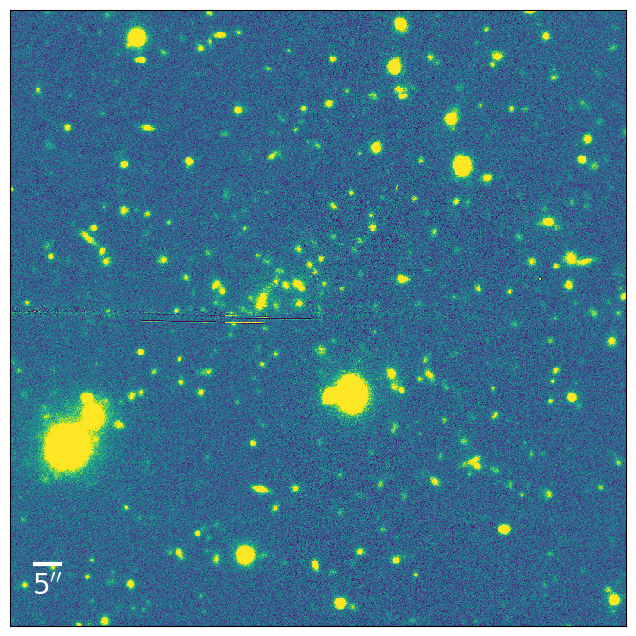

In [5]:
# Get the cutout in i filter and plot
cutout_test = hsc_cutout(coord, cutout_size=size, filters='i', archive=pdr2, use_saved=False, output_dir=output_dir, verbose=True, save_output=True)

w = wcs.WCS(cutout_test[1].header)

_ = plotting.display_single(cutout_test[1].data)

cutout_test.close()

# Retrieving cutout image in filter: g
# Retrieving cutout image in filter: r
# Retrieving cutout image in filter: i


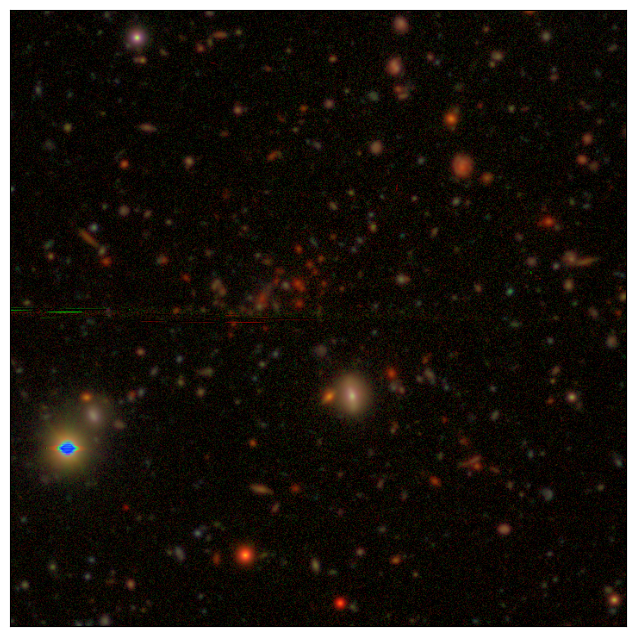

In [6]:
# From the tutorial at https://github.com/dr-guangtou/unagi/blob/master/demo/demo_color_image.ipynb to generate a 3 colour image
cutout_rgb, cutout_wcs = hsc_tricolor(coord, cutout_size=size, filters=filters, verbose=True, save_rgb=False, save_img=False, use_saved=False, archive=pdr2)

fig = plt.subplots(figsize=(8,8))
plt.imshow(cutout_rgb, origin='lower')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
# Try using the hsc downloadCutout script
import downloadCutout # https://hsc-gitlab.mtk.nao.ac.jp/ssp-software/data-access-tools/-/tree/master/pdr3/downloadCutout
from astropy.io import fits
import io
import numpy as np
from astropy.visualization import ZScaleInterval, make_lupton_rgb

In [ ]:
rect = downloadCutout.Rect.create(ra="2:23:03", dec="-4:36:22", sw="1arcmin", sh="1arcmin", rerun="pdr3_dud_rev")

images = downloadCutout.download(rect)
print([i[0]['filter'] for i in images])

# Use astropy to decode the binary data of the fits files
images = [fits.open(io.BytesIO(image[1])) for image in images]

['HSC-G', 'HSC-I', 'HSC-R', 'HSC-Y', 'HSC-Z', 'NB0387', 'NB0816', 'NB0921']


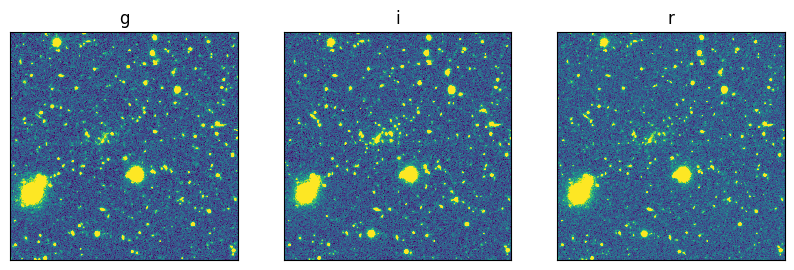

In [ ]:
# Images is a list of HDULists
data = [image[1].data for image in images]

plt.figure(figsize=(10,8))

# Plot the data
for i, f in enumerate(['g', 'i', 'r']):
    img_scale = np.arcsinh(data[i])
    vmin, vmax = ZScaleInterval(contrast=0.25).get_limits(img_scale) 

    plt.subplot(1, 3, i+1)
    plt.imshow(img_scale, origin='lower', interpolation='none', vmin=vmin, vmax=vmax, alpha=1.0)
    plt.xticks([])
    plt.yticks([])
    plt.title(f)
plt.show()


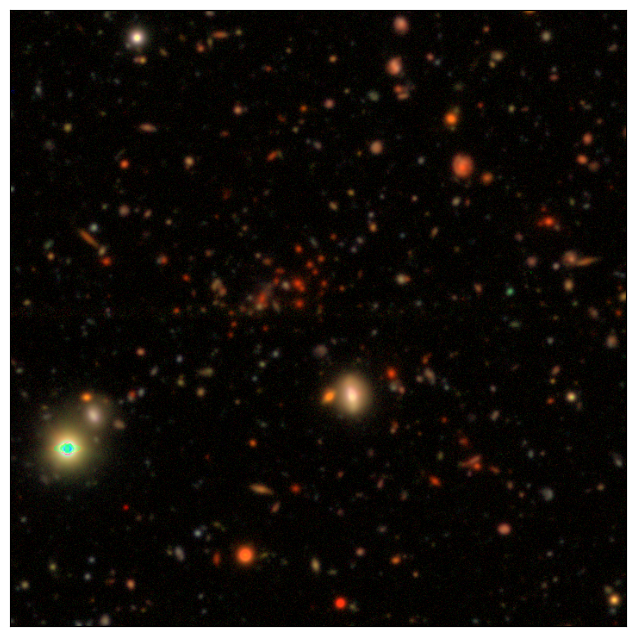

In [ ]:
rgb_img = make_lupton_rgb(data[1], data[2], data[0], stretch=0.5)

plt.figure(figsize=(8,8))
plt.imshow(rgb_img, origin='lower') 
plt.xticks([])
plt.yticks([])
plt.show()